In [22]:
import pandas as pd

# Loading dataset
df = pd.read_csv('/content/mbti_1.csv')

# Info of dataset
print("Shape:", df.shape)
df.head()

print("\n")

#Description of dataset
print("Dataset Description: \n", df.describe())



Shape: (8675, 2)


Dataset Description: 
         type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'It has been too long since I have been on per...
freq    1832                                                  1




Number of posts for each MBTI Personality: 
 type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


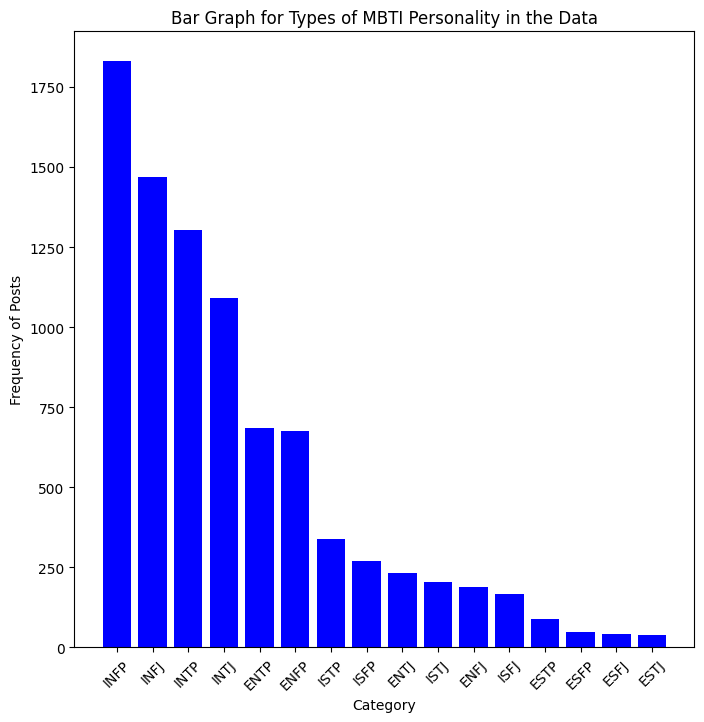

In [18]:
import matplotlib.pyplot as plt

# Plotting frequency of different categories
countCategory = df['type'].value_counts()
print('\n')

print("Number of posts for each MBTI Personality: \n",countCategory)

# Bar Graph
plt.figure(figsize=(8, 8))
plt.bar(countCategory.index, countCategory.values, color='blue')
plt.xlabel('Category')
plt.ylabel('Frequency of Posts')
plt.title('Bar Graph for Types of MBTI Personality in the Data')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()

#PREPROCESSING

In [24]:
import nltk
import re
import string

# Download necessary resources
nltk.download('stopwords')
#nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Optional: List of MBTI types to remove from posts
mbti_types = [
    'INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP',
    'ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP'
]

def clean_text(text):
    # Lowercase text
    text = text.lower()

    # Removing MBTI types
    for mbti in mbti_types:
        text = re.sub(mbti.lower(), '', text)

    # Removing URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Removing punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)


df['clean_posts'] = df['posts'].apply(clean_text)

# View cleaned data
df[['type', 'clean_posts']].head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,type,clean_posts
0,INFJ,moment sportscenter top ten play prankswhat li...
1,ENTP,im finding lack post alarmingsex boring positi...
2,INTP,good one course say know thats blessing cursed...
3,INTJ,dear enjoyed conversation day esoteric gabbing...
4,ENTJ,youre firedthats another silly misconception a...


In [25]:
# Create 4 binary labels
df['IE'] = df['type'].apply(lambda x: 1 if x[0] == 'I' else 0)  # 1 = I, 0 = E
df['NS'] = df['type'].apply(lambda x: 1 if x[1] == 'N' else 0)  # 1 = N, 0 = S
df['TF'] = df['type'].apply(lambda x: 1 if x[2] == 'T' else 0)  # 1 = T, 0 = F
df['JP'] = df['type'].apply(lambda x: 1 if x[3] == 'J' else 0)  # 1 = J, 0 = P

df[['type', 'IE', 'NS', 'TF', 'JP']].head()


,type,IE,NS,TF,JP
0,INFJ,1,1,0,1
1,ENTP,0,1,1,0
2,INTP,1,1,1,0
3,INTJ,1,1,1,1
4,ENTJ,0,1,1,1



Check for emojis

In [19]:
import re

# Emoji pattern
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # Flags
                           u"\U00002700-\U000027BF"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)

# Check how many posts contain emojis
emoji_counts = df['posts'].apply(lambda x: bool(emoji_pattern.search(x)))
print("Posts with emojis:", emoji_counts.sum())

# Optionally view few examples
df[emoji_counts].head(3)['posts']


Posts with emojis: 215


,posts
6,"'No, I can't draw on my own nails (haha). Thos..."
83,'Bump|||Escobar and Co. Escobar- ENTJ Gustavo...
88,'Newton's Universal Gravity Law. I mean seriou...
